In [2]:
#Read from CSV file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Spelunky.csv', sep = ',', encoding = 'latin-1')
del df['URL']

print(df)


        Run ID   User ID  User Name             Category  Hours  Minutes  \
0     6yjlx0nz  zxzq79xq   krille71                 Any%    0.0      2.0   
1     7ylkeg3z  zxzq79xq   krille71                Hell%    0.0      4.0   
2     pzgwd4ny  zxzq79xq   krille71                 Low%    0.0      2.0   
3     7z05q18m  98r22gx1    Nkitten                 Any%    0.0      6.0   
4     9yo92v0y  zxzq79xq   krille71                 Any%    0.0      1.0   
...        ...       ...        ...                  ...    ...      ...   
1834  me619n8z  x7qv97y8  Cosmogato                 Any%    0.0      5.0   
1835  yo3d9qjy  x7qv97y8  Cosmogato   No Teleporter Any%    0.0      5.0   
1836  z1ogx0rm  zxzyz9ej      jjg27                 Low%    0.0      3.0   
1837  y6ro98jy  e8evzvdx      JPlay  All Journal Entries    1.0     15.0   
1838  y2djl0wz  j0n0gk48    Teclord                Hell%    0.0     11.0   

      Seconds Platform ID  Platform Name  Verified        Date  
0       9.339    8gej2

In [3]:
#Clean data

df = df.loc[(df['Category'] == 'Any%') & (df['Verified'] == 'verified') & (df['Date'].notnull())]
df = df.rename({'User Name': 'userName'}, axis=1)
df = df.sort_values(["Date"])
del df['Verified']
del df['Run ID']
del df['User ID']

totalSeconds = []

for x in range(len(df)):
    seconds = 0.0
    seconds += (df.iloc[x].Hours * 3600) + (df.iloc[x].Minutes * 60) + (df.iloc[x].Seconds)
    totalSeconds.append(seconds)

df['TimeSeconds'] = totalSeconds
df = df[['userName', 'Category', 'Hours', 'Minutes', 'Seconds', 'TimeSeconds', 'Platform Name', 'Date']]

print(df)

              userName Category  Hours  Minutes  Seconds  TimeSeconds  \
30             SirFist     Any%    0.0      3.0   42.545      222.545   
247               Grom     Any%    0.0      4.0   34.745      274.745   
3              Nkitten     Any%    0.0      6.0    2.165      362.165   
5      DetectivexConan     Any%    0.0      3.0   21.743      201.743   
145   Bananasaurus_Rex     Any%    0.0      2.0    8.988      128.988   
...                ...      ...    ...      ...      ...          ...   
1783         HectiqueX     Any%    0.0      2.0   50.618      170.618   
1795      PastryPerson     Any%    0.0      4.0   24.439      264.439   
1805            diedai     Any%    0.0      2.0    6.353      126.353   
1829           Mikulus     Any%    0.0      3.0   17.997      197.997   
1834         Cosmogato     Any%    0.0      5.0    5.267      305.267   

     Platform Name        Date  
30        XBox 360  2013-08-08  
247             PC  2013-12-06  
3               PC  2014

              userName Category  Hours  Minutes  Seconds  TimeSeconds  \
30             SirFist     Any%    0.0      3.0   42.545      222.545   
5      DetectivexConan     Any%    0.0      3.0   21.743      201.743   
145   Bananasaurus_Rex     Any%    0.0      2.0    8.988      128.988   
7                  Bum     Any%    0.0      1.0   48.068      108.068   
120          Pibonacci     Any%    0.0      1.0   45.169      105.169   
107              d_tea     Any%    0.0      1.0   40.145      100.145   
15            Kinnijup     Any%    0.0      1.0   39.716       99.716   
283           Kinnijup     Any%    0.0      1.0   38.929       98.929   
356           Kinnijup     Any%    0.0      1.0   37.251       97.251   
1000          Kinnijup     Any%    0.0      1.0   37.111       97.111   

     Platform Name        Date  
30        XBox 360  2013-08-08  
5               PC  2014-05-07  
145             PC  2014-06-08  
7               PC  2014-10-13  
120             PC  2015-06-05 

Text(0.5, 1.0, 'Spelunky (Any%) World Record Progression')

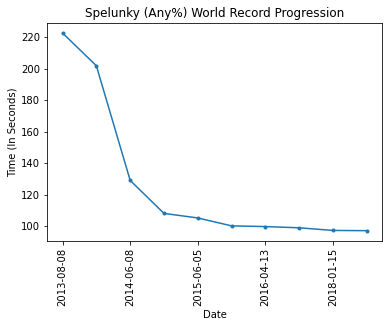

In [4]:
#Find World Record Progression

worldRecords = []
minTime = df.iloc[0].TimeSeconds

for x in range(len(df)):
    if df.iloc[x].TimeSeconds <= minTime:
        worldRecords.append(df.iloc[x])
        minTime = df.iloc[x].TimeSeconds

wrdf = pd.DataFrame(worldRecords)
print(wrdf)

wrdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky (Any%) World Record Progression")

In [5]:
#Print Leadboard

rankingsFirst = df.sort_values(["Hours", "Minutes", "Seconds"])
rankingsFirst = rankingsFirst.drop_duplicates(subset = "userName")

print("Fastest Times: ")
print (rankingsFirst)

rankingsLast = df.sort_values(["Date"])
rankingsLast = rankingsLast.drop_duplicates(subset = "userName")
print("First Entires: ")
print(rankingsLast)

#TODO: Make array of tuples with (userName, timesecondsFastest, timesecondsFirst)

Fastest Times: 
            userName Category  Hours  Minutes  Seconds  TimeSeconds  \
1000        Kinnijup     Any%    0.0      1.0   37.111       97.111   
1088           d_tea     Any%    0.0      1.0   38.774       98.774   
615         krille71     Any%    0.0      1.0   44.378      104.378   
120        Pibonacci     Any%    0.0      1.0   45.169      105.169   
7                Bum     Any%    0.0      1.0   48.068      108.068   
...              ...      ...    ...      ...      ...          ...   
1778  tubby_thiccems     Any%    0.0      7.0   24.166      444.166   
1003    FinchMcQuill     Any%    0.0      7.0   24.912      444.912   
1609  AFewGoodTaters     Any%    0.0      7.0   25.722      445.722   
363           A1exJP     Any%    0.0     10.0   56.801      656.801   
74        Kazzyblood     Any%    0.0     15.0   38.399      938.399   

      Platform Name        Date  
1000             PC  2020-04-26  
1088             PC  2020-07-18  
615              PC  2018-12-

      userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
15    Kinnijup     Any%    0.0      1.0   39.716       99.716            PC   
283   Kinnijup     Any%    0.0      1.0   38.929       98.929            PC   
356   Kinnijup     Any%    0.0      1.0   37.251       97.251            PC   
1000  Kinnijup     Any%    0.0      1.0   37.111       97.111            PC   

            Date  
15    2016-04-13  
283   2017-10-12  
356   2018-01-15  
1000  2020-04-26  
     userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
107     d_tea     Any%    0.0      1.0   40.145      100.145            PC   
1088    d_tea     Any%    0.0      1.0   38.774       98.774            PC   

            Date  
107   2016-03-05  
1088  2020-07-18  
     userName Category  Hours  Minutes  Seconds  TimeSeconds Platform Name  \
0    krille71     Any%    0.0      2.0    9.339      129.339            PC   
4    krille71     Any%    0.0      1.0   56.402      116.402 

Text(0.5, 1.0, 'Spelunky (Any%) Bum Progression')

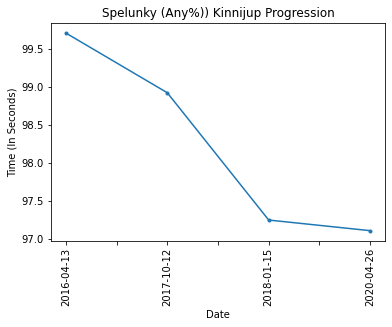

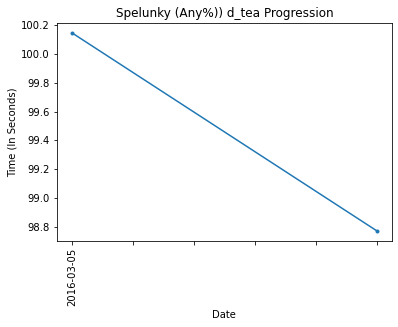

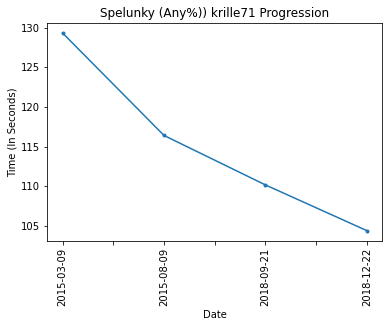

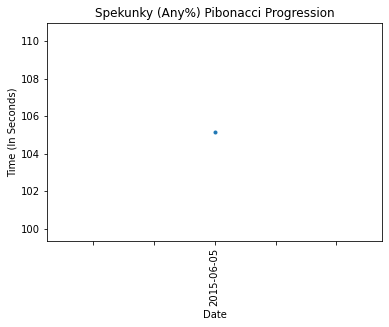

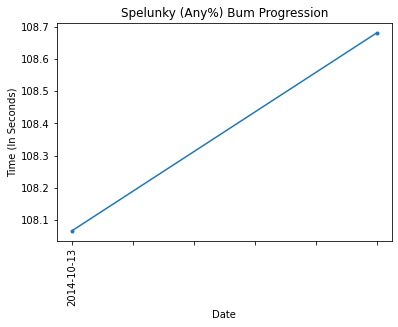

In [6]:
#Graph 5 Fastest Players

wrhdf = df.loc[df['userName'] == 'Kinnijup']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky (Any%)) Kinnijup Progression")

wrhdf = df.loc[df['userName'] == 'd_tea']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky (Any%)) d_tea Progression")

wrhdf = df.loc[df['userName'] == 'krille71']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky (Any%)) krille71 Progression")

wrhdf = df.loc[df['userName'] == 'Pibonacci']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spekunky (Any%) Pibonacci Progression")

wrhdf = df.loc[df['userName'] == 'Bum']
print(wrhdf)
wrhdf.plot(kind = 'line', x = 'Date', y = 'TimeSeconds', rot = 90, legend = False, style='.-')
plt.ylabel("Time (In Seconds)")
plt.title("Spelunky (Any%) Bum Progression")

Text(0.5, 1.0, 'Spelunky Platform Distribution')

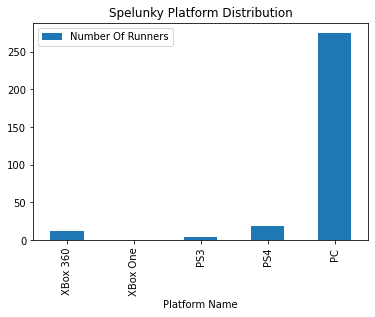

In [7]:
xboxCount = np.count_nonzero(df['Platform Name']=='XBox 360')
pcCount = np.count_nonzero(df['Platform Name']=='PC')
ps3Count = np.count_nonzero(df['Platform Name']=='Playstation 3')
ps4Count = np.count_nonzero(df['Platform Name']=='Playstation 4')
xbox1Count = np.count_nonzero(df['Platform Name']=='XBox One')

platformsArray = ([ ['XBox 360', xboxCount], ['XBox One', xbox1Count], ['PS3', ps3Count], ['PS4', ps4Count], ['PC', pcCount]])
platformdf = pd.DataFrame(data = platformsArray, columns = ['Platform Name', 'Number Of Runners'])

platformdf.plot(kind = 'bar', x='Platform Name', y='Number Of Runners', legend = True)
plt.title("Spelunky Platform Distribution")

Text(0.5, 1.0, 'Spelunky Quantity of Runs by Year')

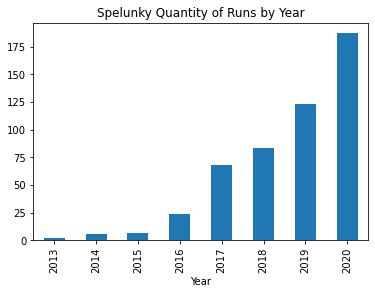

In [8]:
count2013 = np.count_nonzero(df['Date'] < '2014-01-01')
count2014 = np.count_nonzero(df['Date'] < '2015-01-01') - count2013
count2015 = np.count_nonzero(df['Date'] < '2016-01-01') - count2014
count2016 = np.count_nonzero(df['Date'] < '2017-01-01') - count2015
count2017 = np.count_nonzero(df['Date'] < '2018-01-01') - count2016
count2018 = np.count_nonzero(df['Date'] < '2019-01-01') - count2017
count2019 = np.count_nonzero(df['Date'] < '2020-01-01') - count2018
count2020 = np.count_nonzero(df['Date']) - count2019

monthsArray = ([ ['2013', count2013], ['2014', count2014], ['2015', count2015], ['2016', count2016], ['2017', count2017], ['2018', count2018], ['2019', count2019], ['2020', count2020]])
monthsdf = pd.DataFrame(data = monthsArray, columns = ['Year', 'Number of Runs Submitted'])

monthsdf.plot(kind = 'bar', x = 'Year', y='Number of Runs Submitted', legend = False)
plt.title("Spelunky Quantity of Runs by Year")